In [1]:
# (0) セットアップ

import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import erf
import matplotlib.pyplot as plt

def error_rate(x, a, b):
    return (1 - erf((x-a) / b * np.sqrt(2))) / 2

def calc_sd(x_data, y_data):
    initial_params = [-5, 1.0]
    params, covariance = curve_fit(error_rate, x_data, y_data, p0=initial_params)

    # フィッティングされた曲線を描画
    x_fit = np.linspace(min(x_data), max(x_data), 100)
    y_fit = error_rate(x_fit, *params)

    plt.scatter(x_data, y_data, label='Data')
    plt.plot(x_fit, y_fit, label='Fitted Curve', color='red')
    plt.legend()

    plt.rcParams['font.family'] = ''
    # plt.title('データ入力時刻とクロック入力時刻の差とDFFのエラー率の関係')
    # plt.xlabel('データ入力時刻 - クロック入力時刻')
    # plt.ylabel('エラー確率')
    plt.xlabel('clock - data (ps)')
    plt.ylabel('Error Rate')

    # x軸の目盛りを整数値にする
    x_ticks = np.arange(int(min(x_data)), int(max(x_data)) + 1, 2)  # ステップサイズを2に設定
    plt.xticks(x_ticks)

    plt.show()
    print("Fitted Parameters:", params)
    return params

    
def calc_sd_hold(x_data,y_data):
    # フィッティングの実行
    params, covariance = curve_fit(error_rate, x_data, y_data)

    # フィッティングされた曲線を描画
    x_fit = np.linspace(min(x_data), max(x_data), 100)
    y_fit = error_rate(x_fit, *params)

    plt.scatter(x_data, y_data, label='Data')
    plt.plot(x_fit, y_fit, label='Fitted Curve', color='red')
    plt.legend()
    plt.xscale('linear')
    # plt.yscale('log', base=10)

    plt.rcParams['font.family'] = ''
    #plt.title(title)
    # plt.title('データ入力時刻とクロック入力時刻の差とDFFのエラー率の関係')
    # plt.xlabel('データ入力時刻 - クロック入力時刻')
    # plt.ylabel('エラー率')
    plt.xlabel('data - clock (ps)')
    plt.ylabel('Error Rate')

    # x軸の目盛りを整数値にする
    x_ticks = np.arange(int(min(x_data)), int(max(x_data)) + 1, 2)  # ステップサイズを2に設定
    plt.xticks(x_ticks)

    plt.show()
    print("Fitted Parameters:", params)
    return params

    
def curve_point_search(x_data,y_data):
    data_index = 0
    for i,data  in enumerate(x_data):
        if i < len(x_data):
            if 0 < float(data) and 1.0 > float(data) and 0 < float(x_data[i]) and 1.0 > float(x_data[i]):
                data_index = i
                break
    return x_data[data_index:data_index+30]

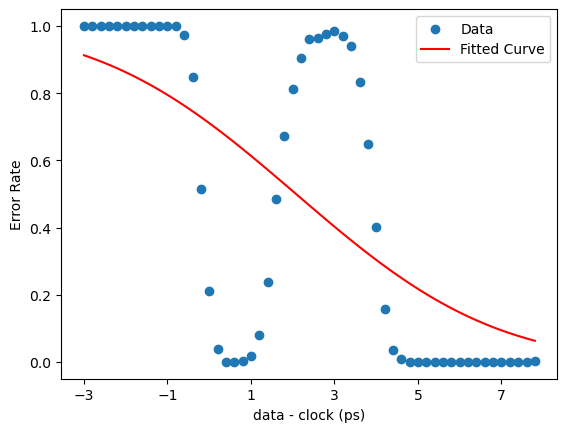

Fitted Parameters: [2.07804675 7.48039996]


In [4]:
# (1) ホールドタイムの計算

# パラメータの指定
lic = 74.4 * 2.4
ic = 50

# ファイル名の指定
file = "timing_ush/hold_"+ str(lic) + "_" +str(ic)+".csv"
# log_file = "time_param.csv"

df = pd.read_csv(file,names=["time","error_count","clock1_rate","clock2_rate","clock3_rate"])
x_data = df["time"]-400
y_data = 1-df["clock2_rate"]

# カーブフィッティング
params = calc_sd_hold(x_data, y_data)

#　ファイルに書き込み
#pd.DataFrame([{'lic':lic,'ic':ic,'mean':round(params[0],3),'std':round(params[1],3)}]).to_csv(log_file,mode="a",header=False,index=False)



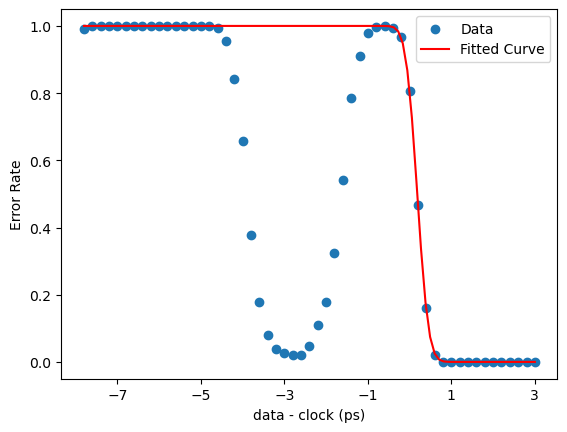

Fitted Parameters: [0.18330462 0.42595385]


In [12]:
# (2) セットアップタイムの計算

# パラメータの指定
lic = 74.4 * 2.4
ic = 50

# ファイル名の指定
file = "timing_ush/setup_"+ str(lic) + "_" +str(ic)+".csv"
# log_file = "timing/setup_time.csv"

df = pd.read_csv(file,names=["time","error_count","clock1_rate","clock2_rate","clock3_rate"])
x_data = 500-df["time"]
# y_data = 1-df["clock2_rate"]
y_data = 1-df["clock3_rate"]

# カーブフィッティング
params = calc_sd_hold(x_data,y_data)
#　ファイルに書き込み
#pd.DataFrame([{'lic':lic,'ic':ic,'mean':round(params[0],3),'std':round(params[1],3)}]).to_csv(log_file,mode="a",header=False,index=False)



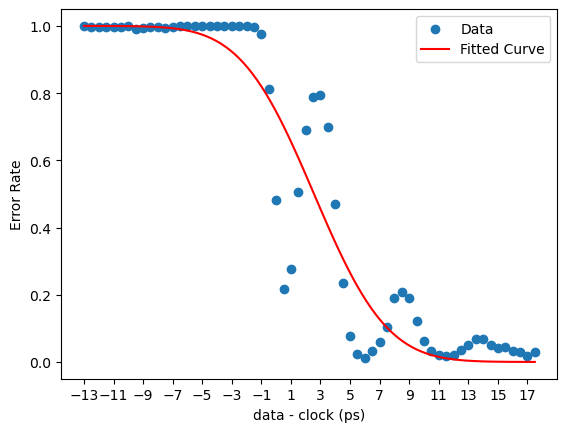

Fitted Parameters: [2.56091335 7.77917356]


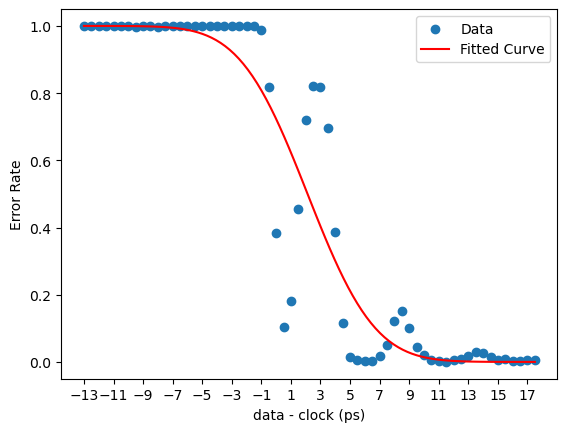

Fitted Parameters: [2.12429826 7.17357534]


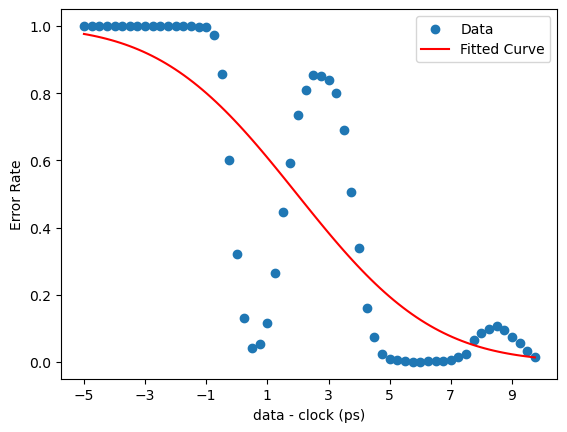

Fitted Parameters: [1.96372742 7.03654572]


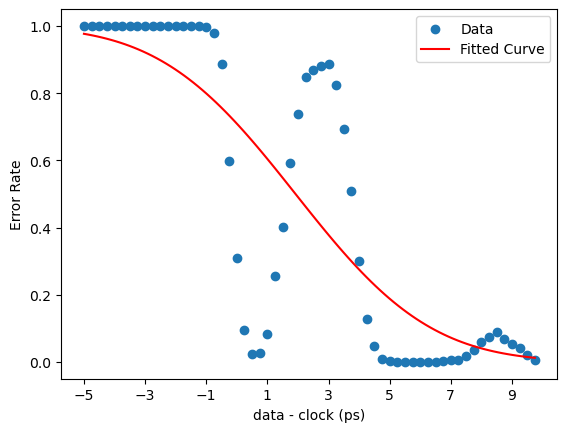

Fitted Parameters: [1.91941301 6.96307675]


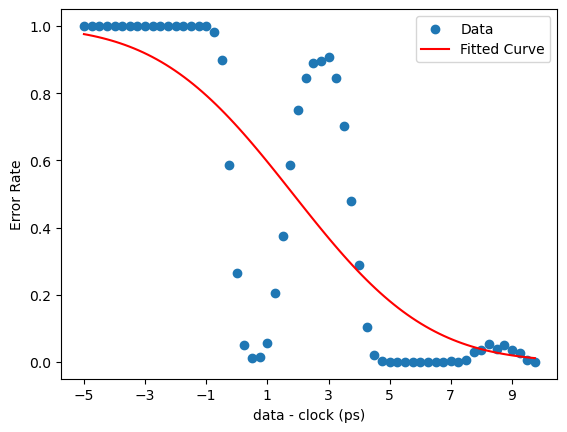

Fitted Parameters: [1.83915888 6.94084934]


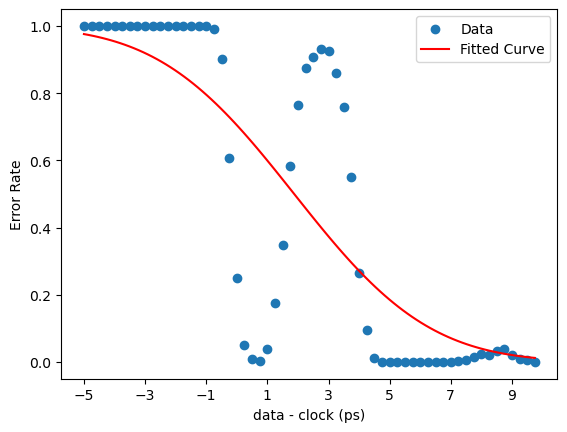

Fitted Parameters: [1.8759677  6.97109025]


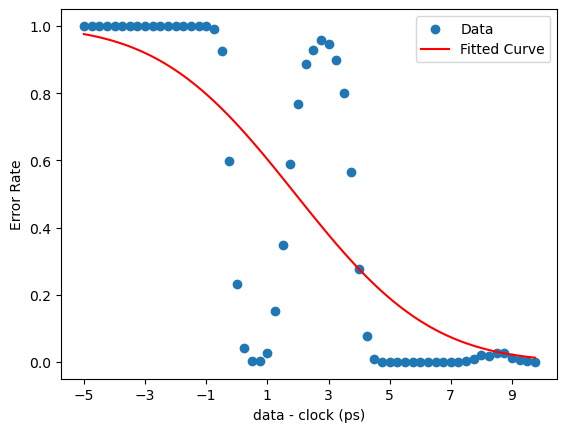

Fitted Parameters: [1.91520788 7.01508248]


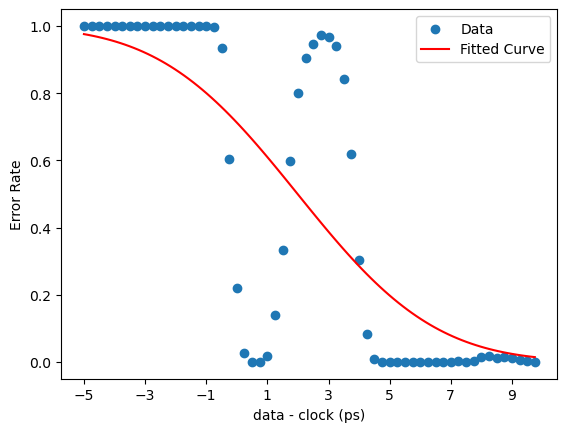

Fitted Parameters: [1.98681909 7.09010749]


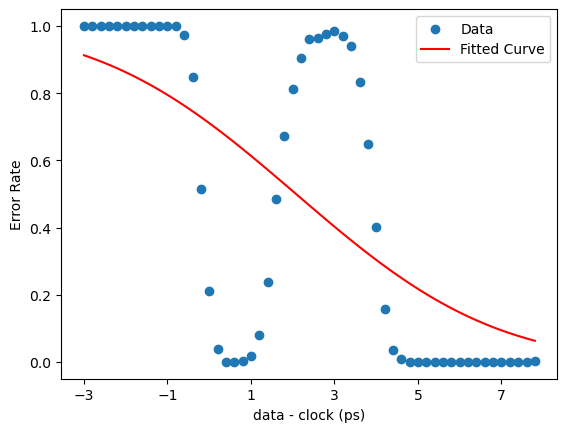

Fitted Parameters: [2.07804675 7.48039996]


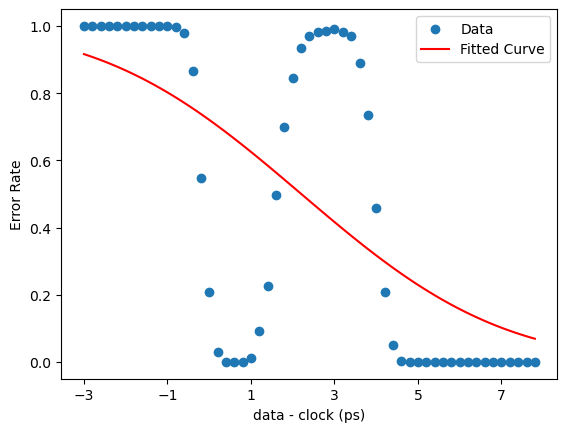

Fitted Parameters: [2.2041043  7.54573426]


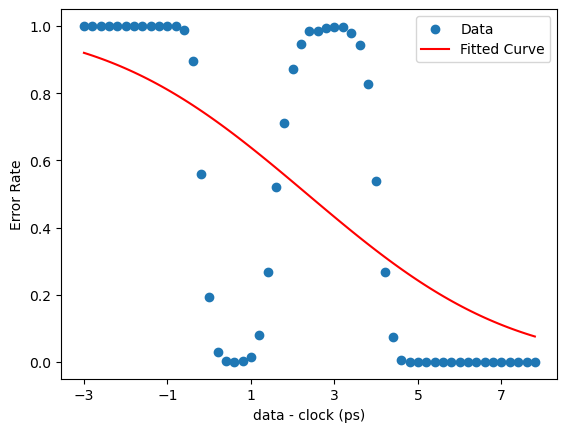

Fitted Parameters: [2.34231481 7.60767757]


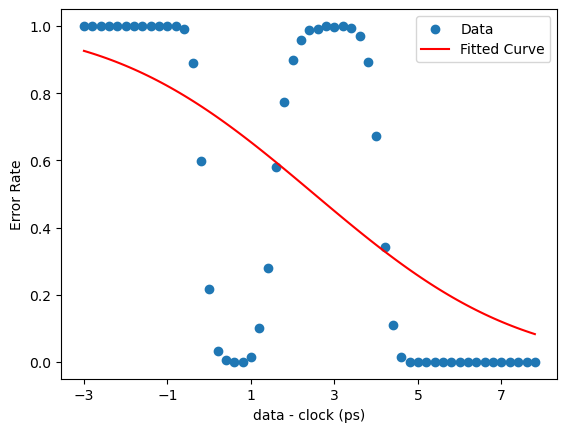

Fitted Parameters: [2.51129043 7.62852913]


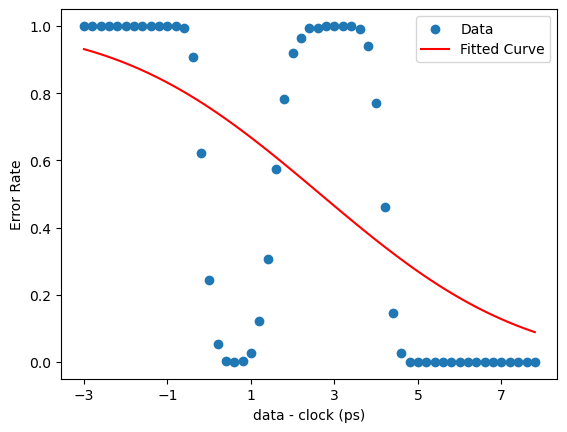

Fitted Parameters: [2.65546853 7.62756644]


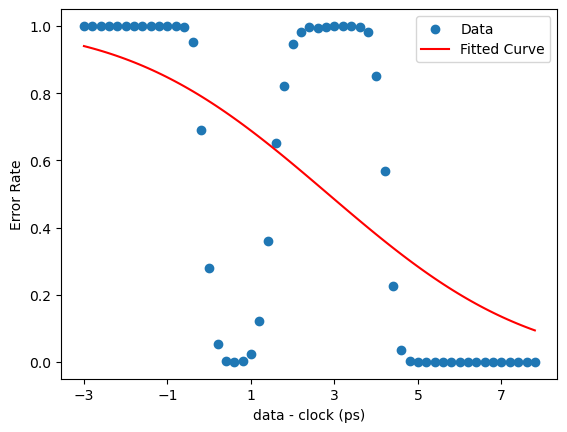

Fitted Parameters: [2.84657101 7.51972443]


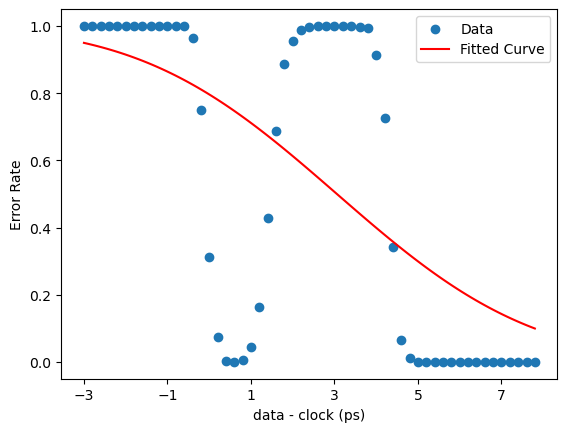

Fitted Parameters: [3.05699525 7.38352204]


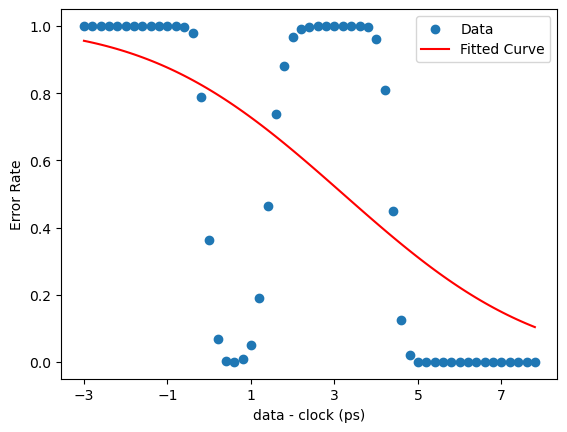

Fitted Parameters: [3.20588258 7.2860175 ]


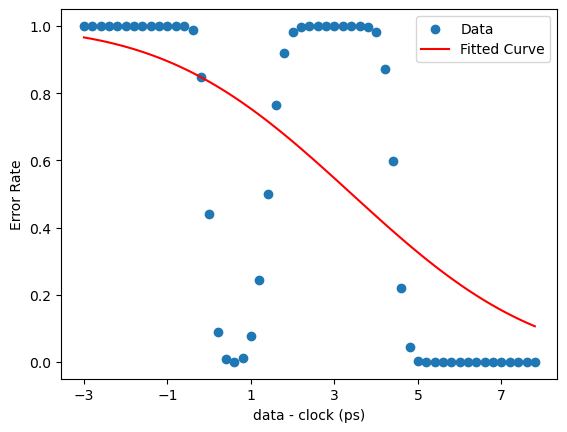

Fitted Parameters: [3.41079036 7.0360233 ]


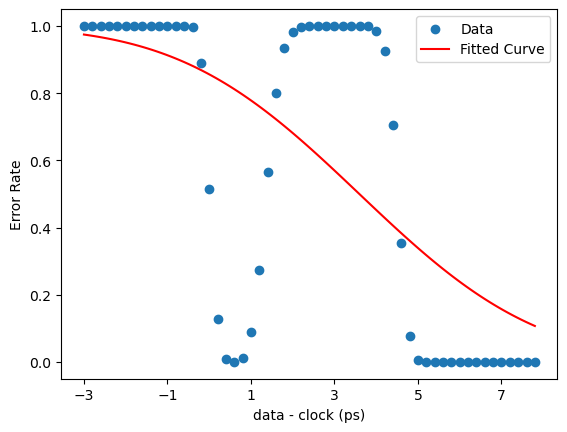

Fitted Parameters: [3.59472434 6.76833188]


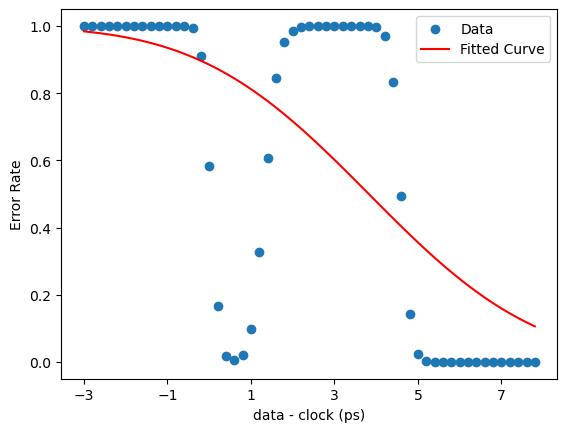

Fitted Parameters: [3.82005894 6.3741821 ]


In [8]:
# (3))複数の臨界電流値での算出
log_file = "timing_ush/hold_time.csv"
lic = 74.4 * 2.4

for ic in range(10,105,5):
    file = "timing_ush/hold_"+str(lic)+"_"+str(ic)+".csv"
    df = pd.read_csv(file,names=["time","error_count","clock1_rate","clock2_rate","clock3_rate"])
    x_data = df["time"]-400
    y_data = 1-df["clock2_rate"]
    params = calc_sd_hold(x_data,y_data)
    pd.DataFrame([{'lic':lic,'ic':ic,'mean':round(params[0],3),'std':round(params[1],3)}]).to_csv(log_file,mode="a",header=False,index=False)



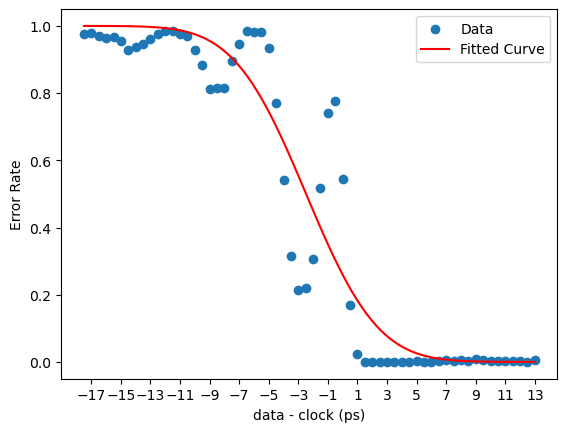

Fitted Parameters: [-2.47425909  7.67254623]


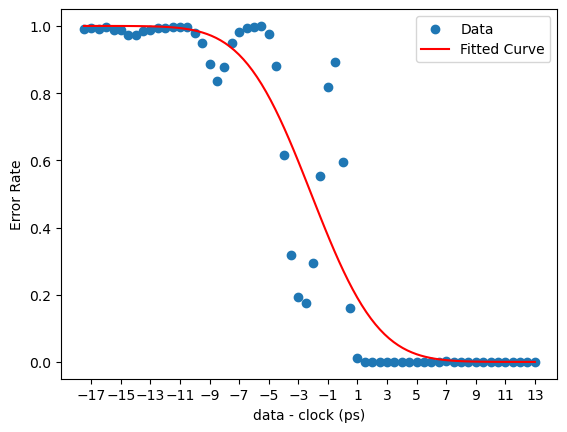

Fitted Parameters: [-2.12675139  7.13787904]


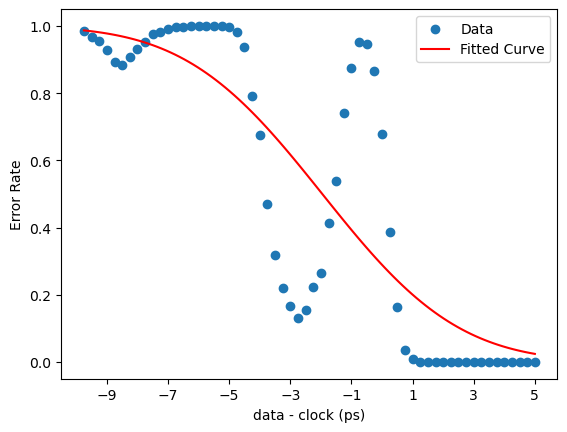

Fitted Parameters: [-1.95453203  7.02810726]


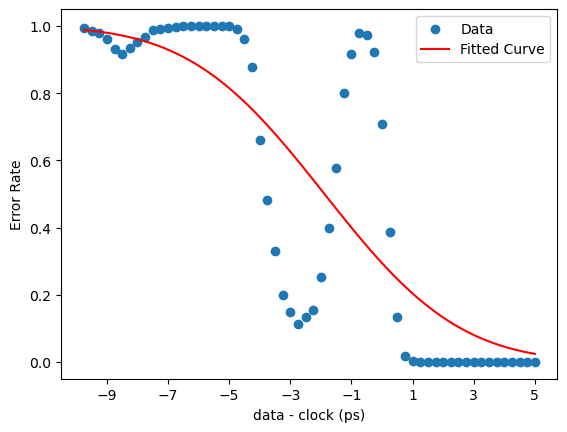

Fitted Parameters: [-1.88308472  6.95893862]


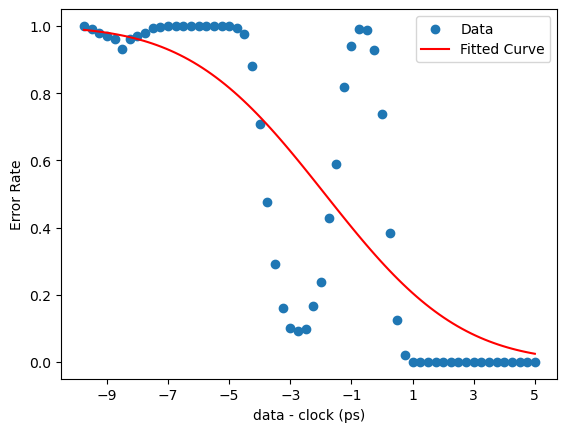

Fitted Parameters: [-1.86849662  6.9623481 ]


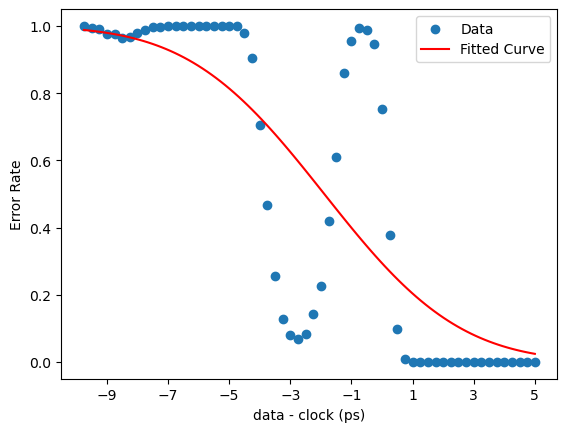

Fitted Parameters: [-1.88981152  6.97032739]


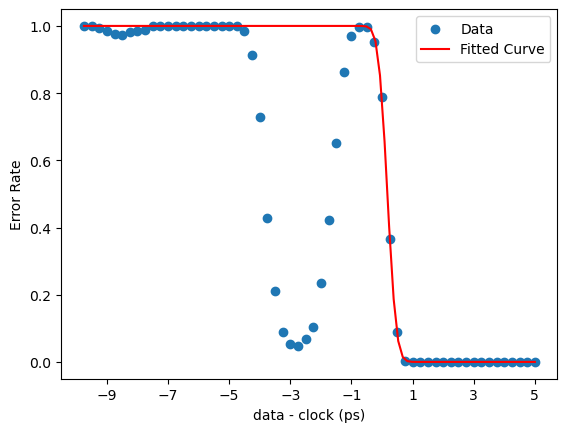

Fitted Parameters: [0.17612411 0.46128204]


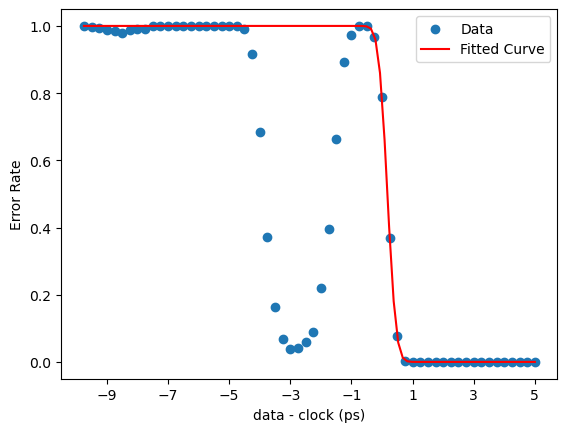

Fitted Parameters: [0.17674664 0.44860861]


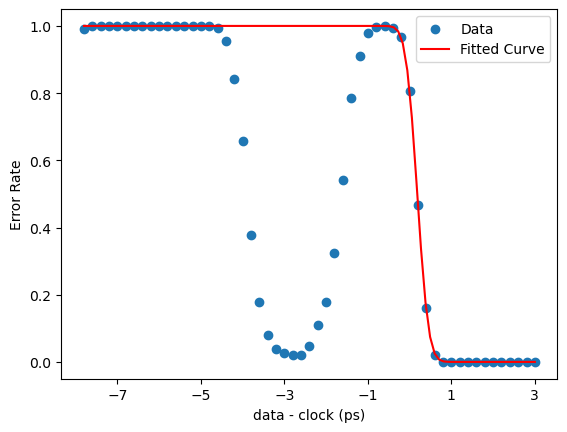

Fitted Parameters: [0.18330462 0.42595385]


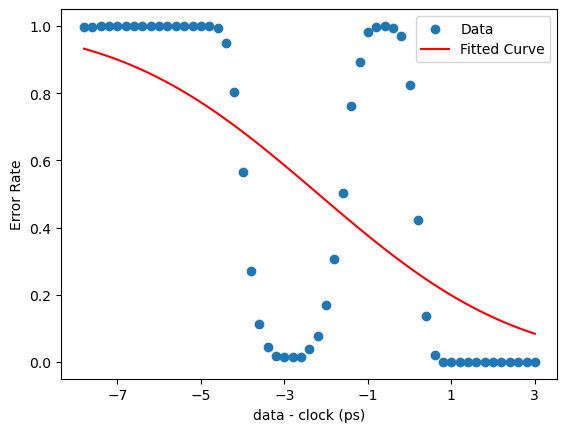

Fitted Parameters: [-2.18898147  7.52103194]


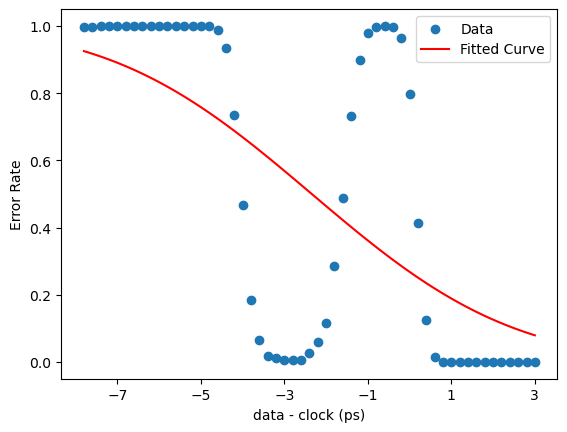

Fitted Parameters: [-2.34472322  7.57859554]


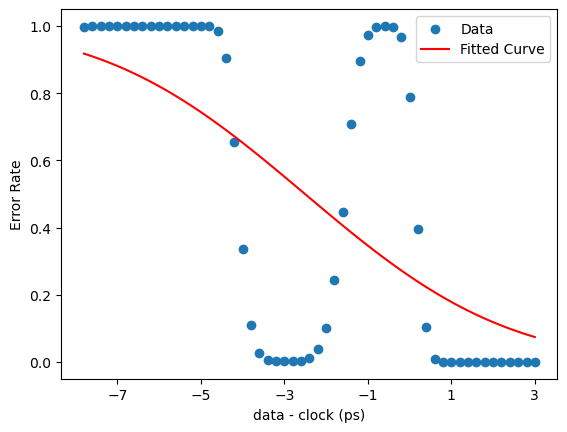

Fitted Parameters: [-2.50784589  7.61846818]


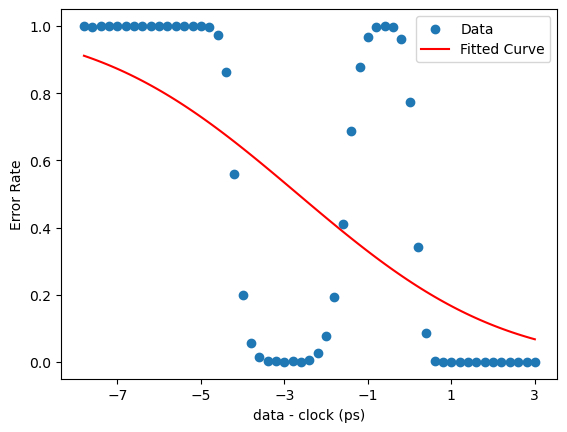

Fitted Parameters: [-2.67958079  7.59422019]


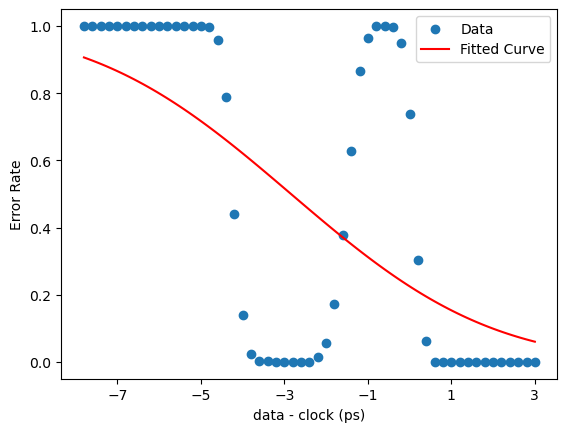

Fitted Parameters: [-2.84229251  7.52416408]


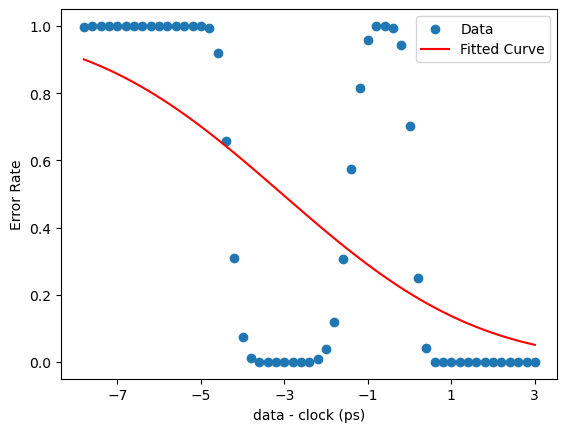

Fitted Parameters: [-3.05286345  7.39439835]


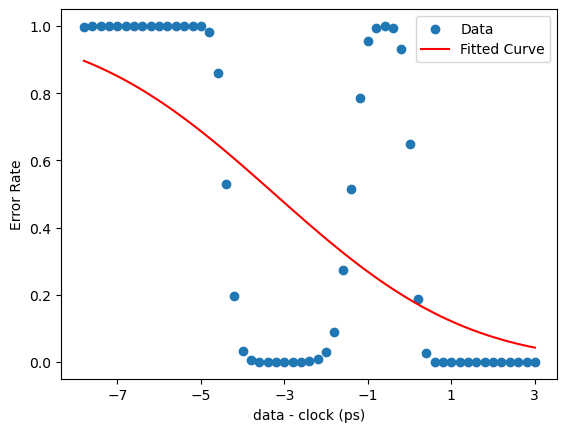

Fitted Parameters: [-3.23659509  7.24260732]


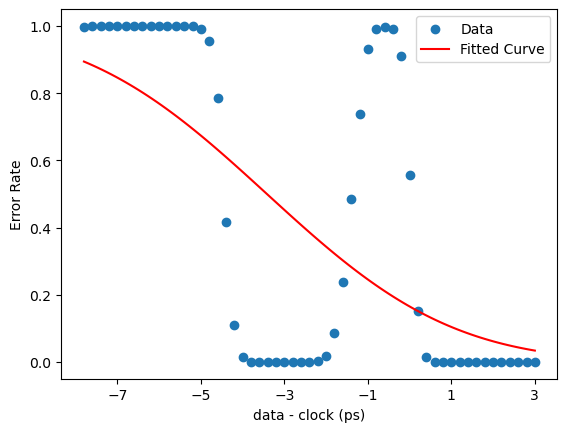

Fitted Parameters: [-3.41932261  7.02123089]


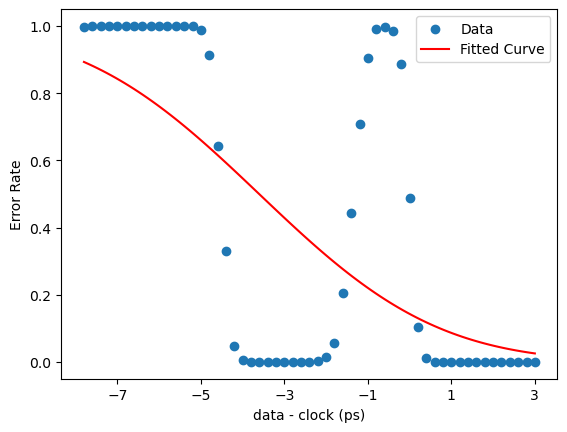

Fitted Parameters: [-3.60598939  6.7565253 ]


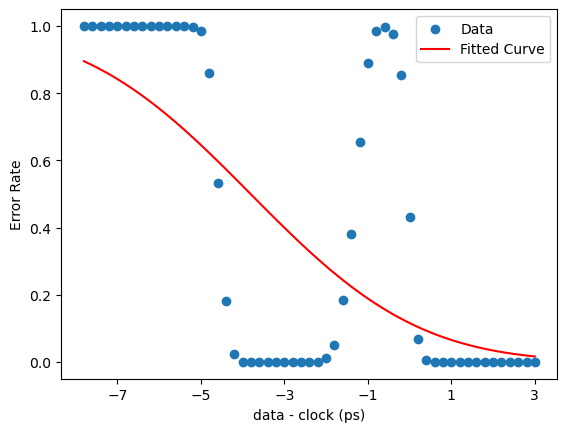

Fitted Parameters: [-3.80955033  6.3663398 ]


In [13]:
log_file = "timing_ush/setup_time.csv"
lic = 74.4 * 2.4

for ic in range(10,105,5):
    file = "timing_ush/setup_"+str(lic)+"_"+str(ic)+".csv"
    df = pd.read_csv(file,names=["time","error_count","clock1_rate","clock2_rate","clock3_rate"])
    x_data = 500-df["time"]
    # y_data = 1-df["clock2_rate"]
    y_data = 1-df["clock3_rate"]
    params = calc_sd_hold(x_data,y_data)
    pd.DataFrame([{'lic':lic,'ic':ic,'mean':round(params[0],3),'std':round(params[1],3)}]).to_csv(log_file,mode="a",header=False,index=False)

